# Residual Networks and Architecture

## 1. What are ResNets and how do they work?

ResNets, short for Residual Networks, are a type of deep neural network architecture that have revolutionized the field of computer vision. They were introduced by Kaiming He et al. in their 2015 paper "Deep Residual Learning for Image Recognition."

ResNets were designed to address the problem of training very deep neural networks. As the depth of a network increases, it becomes difficult for the network to learn and optimize the parameters effectively. Deep networks often suffer from the problem of vanishing gradients, where the gradients become extremely small during backpropagation, making it challenging to update the earlier layers of the network.

The key innovation of ResNets is the introduction of residual connections, or skip connections, which allow the network to learn residual functions. Instead of directly learning the desired underlying mapping, ResNets learn the residual functions that model the difference between the desired mapping and the current output of the network. By using residual connections, the gradients can flow directly through the network, mitigating the vanishing gradient problem.

Here's how ResNets work in practice:

1. Input: The ResNet architecture typically starts with a traditional convolutional layer that takes the input image.

2. Convolutional Layers: A series of convolutional layers with non-linear activation functions follow the initial layer. These layers extract features from the input image at different levels of abstraction.

3. Residual Blocks: The core building blocks of ResNets are residual blocks. Each residual block consists of multiple convolutional layers, followed by an element-wise addition operation that combines the output of the block with the input to the block. This addition operation allows the network to learn the residual function.

4. Shortcut Connections: The skip or shortcut connections directly connect the input of a residual block to its output, bypassing the convolutional layers. These connections enable the gradients to flow directly through the network and facilitate the learning of residual functions.

5. Global Average Pooling: At the end of the convolutional layers, a global average pooling layer is applied to reduce the spatial dimensions of the feature maps to a fixed-size vector.

6. Fully Connected Layers: Finally, one or more fully connected layers are added to map the vector representation to the desired number of classes or regression outputs.

The depth of ResNets can vary, and deeper networks tend to yield better performance. However, very deep ResNets can be challenging to train due to issues like overfitting or vanishing/exploding gradients. To overcome these challenges, techniques such as batch normalization and identity mappings have been introduced in subsequent variants of ResNets.

ResNets have achieved state-of-the-art performance in various computer vision tasks, including image classification, object detection, and semantic segmentation, and have become a standard architecture for deep learning in vision-related domains.

![resnet-working.png](/home/tanishpatel01/research/Ridgeant_Reasearch_Work-ML/ResNet-Working.png)

## 2. Building Blocks of ResNet

In ResNet, there are two types of building blocks: Identity blocks and Convolutional blocks. These building blocks are used to construct the residual blocks, which are the core components of the ResNet architecture.

1. **Identity Block**: The identity block is the simpler of the two building blocks. It is used when the input and output dimensions of a residual block are the same. The identity block consists of the following layers:
    * Convolutional Layer 1: This layer performs a 1x1 convolution, which helps in reducing the number of input channels if needed. It is followed by a batch normalization step and a ReLU activation function.
    * Convolutional Layer 2: This layer performs a 3x3 convolution on the output of the previous layer. Again, it is followed by batch normalization and ReLU activation.
    * Convolutional Layer 3: This layer performs another 1x1 convolution to restore the number of channels to the original input.
    * Shortcut Connection: The input to the identity block is directly added to the output of the third convolutional layer. This shortcut connection allows the gradient to flow directly through the block, enabling the network to learn residual functions.
    * Activation: The sum of the input and the output of the third convolutional layer is passed through a ReLU activation function.
2. **Convolutional Block**: The convolutional block is used when the input and output dimensions of a residual block are different. It includes the following layers:
    * Convolutional Layer 1: Similar to the identity block, the first layer performs a 1x1 convolution, followed by batch normalization and ReLU activation.
    * Convolutional Layer 2: This layer performs a 3x3 convolution on the output of the previous layer. Again, batch normalization and ReLU activation are applied.
    * Convolutional Layer 3: This layer performs a 1x1 convolution to adjust the number of channels to match the desired output size.
    * Shortcut Connection: In this case, the shortcut connection involves a 1x1 convolutional layer that changes the number of channels to match the output dimensions. It is followed by batch normalization.
    * Activation: The output of the shortcut connection is added to the output of the third convolutional layer, and the result is passed through a ReLU activation function.

By using identity blocks and convolutional blocks, the ResNet architecture can effectively learn the residual functions needed to optimize the deep neural network. These building blocks, along with the skip connections, enable the successful training of very deep networks, leading to improved performance on various computer vision tasks.

![buildingblocks.png](/home/tanishpatel01/research/Ridgeant_Reasearch_Work-ML/buildingblocks.png)

## 3. Defining the ResNet Model

Here is how the ResNet Architecture would look like

![ResNet -Architecture.png](/home/tanishpatel01/research/Ridgeant_Reasearch_Work-ML/ResNet-Architecture.png)

## Defining ResNet Model

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, time, path
from typing import List, Tuple
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
def identity_block(X, filters):
    f1, f2, f3 = filters
    X_shortcut = X
    X = tf.keras.layers.Conv2D(filters=f1, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.Conv2D(filters=f2, kernel_size=(3, 3), strides=(1, 1), padding='same')(X)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.Conv2D(filters=f3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)
    return X

In [3]:
def convolutional_block(X, filters, s=(2, 2)):
    f1, f2, f3 = filters
    X_shortcut = X
    X = tf.keras.layers.Conv2D(filters=f1, kernel_size=(1, 1), strides=s, padding='valid')(X)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.Conv2D(filters=f2, kernel_size=(3, 3), strides=(1, 1), padding='same')(X)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.Conv2D(filters=f3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X_shortcut = tf.keras.layers.Conv2D(filters=f3, kernel_size=(1, 1), strides=s, padding='valid')(X_shortcut)
    X_shortcut = tf.keras.layers.BatchNormalization(axis=3)(X_shortcut)
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)
    return X

In [4]:
def ResNet50(input_size, classes):
    X_input = tf.keras.layers.Input(input_size)
    X = tf.keras.layers.ZeroPadding2D((3, 3))(X_input)
    X = tf.keras.layers.Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2))(X)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = convolutional_block(X, filters=[64, 64, 256], s=(1, 1))
    X = identity_block(X, filters=[64, 64, 256])
    X = identity_block(X, filters=[64, 64, 256])
    X = convolutional_block(X, filters=[128, 128, 512], s=(2, 2))
    X = identity_block(X, filters=[128, 128, 512])
    X = identity_block(X, filters=[128, 128, 512])
    X = identity_block(X, filters=[128, 128, 512])
    X = convolutional_block(X, filters=[256, 256, 1024], s=(2, 2))
    X = identity_block(X, filters=[256, 256, 1024])
    X = identity_block(X, filters=[256, 256, 1024])
    X = identity_block(X, filters=[256, 256, 1024])
    X = identity_block(X, filters=[256, 256, 1024])
    X = identity_block(X, filters=[256, 256, 1024])
    X = convolutional_block(X, filters=[512, 512, 2048], s=(2, 2))
    X = identity_block(X, filters=[512, 512, 2048])
    X = identity_block(X, filters=[512, 512, 2048])
    X = tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(X)
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(classes, activation='softmax')(X)
    model = tf.keras.models.Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [5]:
epochs = 20
batch_size = 32
img_height, img_width = 52, 52
input_shape = (img_height, img_width, 3)
num_classes = 34

In [6]:
model_resnet = ResNet50(input_size = input_shape, classes = num_classes)
model_resnet.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 52, 52, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 58, 58, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 64)   9472        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 26, 26, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                

## Data Processing

In [7]:
import tensorflow as tf

In [8]:
data_dir = "/kaggle/input/wafer-dataset-new/Dataset"

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="training",
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 34866 files belonging to 34 classes.
Using 27893 files for training.
Found 34866 files belonging to 34 classes.
Using 6973 files for validation.


In [10]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
norm_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
norm_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

## Model Training and Evaluation

In [11]:
model_resnet.compile(
    optimizer='adam', # optimizer
    loss='categorical_crossentropy', # loss function to optimize
    metrics=['accuracy'] # metrics to monitor
)

In [12]:
AUTOTUNE = tf.data.AUTOTUNE
norm_train_ds = norm_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
norm_val_ds = norm_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=1e-2,
        patience=10,
        verbose=1
    )
]

In [14]:
start = time.time()
with tf.device('/gpu:0'):
    model = model_resnet.fit(
        norm_train_ds,
        validation_data=norm_val_ds,
        epochs=40,
    )
stop = time.time()
print(f'Training on GPU took: {(stop-start)/60} minutes')

Epoch 1/40
872/872 [==============================] - 106s 70ms/step - loss: 1.3145 - accuracy: 0.6219 - val_loss: 0.9746 - val_accuracy: 0.7409
Epoch 2/40
872/872 [==============================] - 39s 45ms/step - loss: 0.4330 - accuracy: 0.8779 - val_loss: 0.8036 - val_accuracy: 0.8252
Epoch 3/40
872/872 [==============================] - 38s 44ms/step - loss: 0.3138 - accuracy: 0.9119 - val_loss: 1.6460 - val_accuracy: 0.8367
Epoch 4/40
872/872 [==============================] - 39s 45ms/step - loss: 0.2914 - accuracy: 0.9223 - val_loss: 0.6370 - val_accuracy: 0.9253
Epoch 5/40
872/872 [==============================] - 39s 45ms/step - loss: 0.2344 - accuracy: 0.9389 - val_loss: 0.2295 - val_accuracy: 0.9368
Epoch 6/40
872/872 [==============================] - 39s 45ms/step - loss: 0.1940 - accuracy: 0.9501 - val_loss: 0.1998 - val_accuracy: 0.9446
Epoch 7/40
872/872 [==============================] - 40s 45ms/step - loss: 0.1639 - accuracy: 0.9567 - val_loss: 0.6076 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


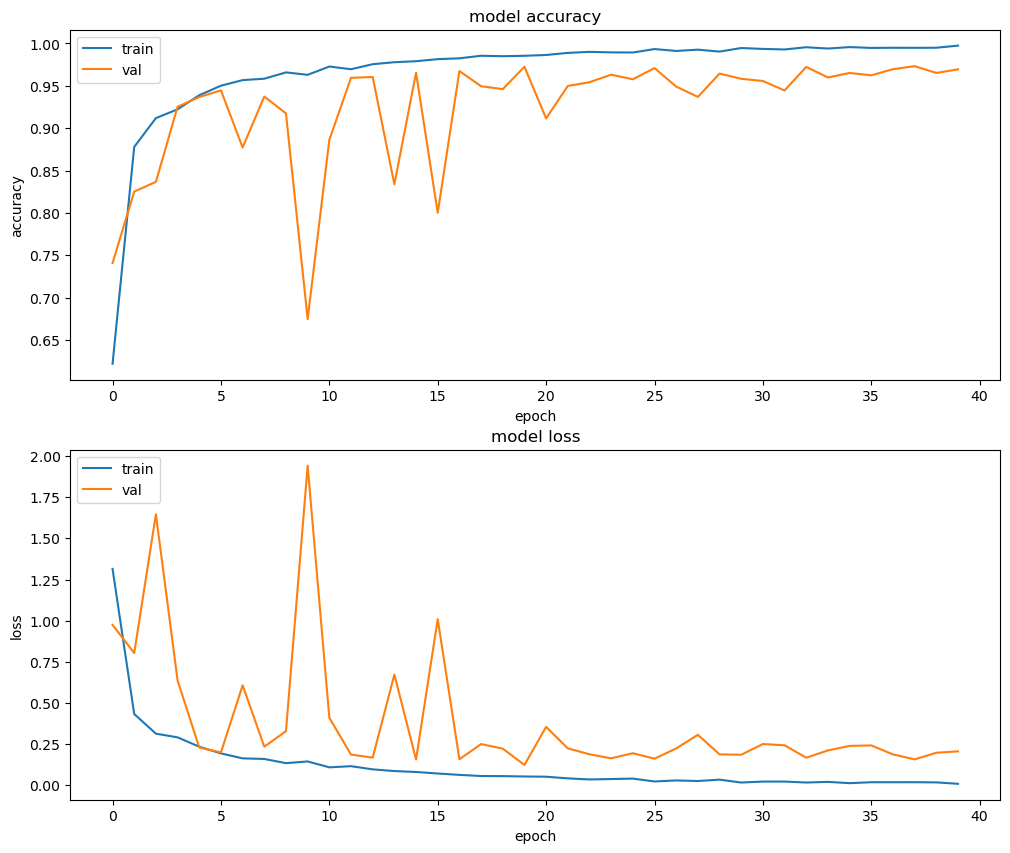

In [15]:
print(model.history.keys())

plt.figure(figsize=(12, 10))

# summarize history for accuracy
plt.subplot(2, 1, 1)
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(2, 1, 2)
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
model_resnet.evaluate(norm_val_ds)

218/218 [==============================] - 3s 14ms/step - loss: 0.2064 - accuracy: 0.9695


[0.20644402503967285, 0.9694536328315735]

In [17]:
model_resnet.save("ResNet-Wafer.h5")